In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
input_path = "../data/notes_all.csv"

In [38]:
# Read data
df = pd.read_csv(input_path);
df = df.dropna();

In [39]:
# Add column CONT as mean of TP2, TP3, TP4, TP5, TP6 and TP7
df['CONT'] = df[['TP2', 'TP3', 'TP4', 'TP5', 'TP6', 'TP7']].mean(axis=1);
df = df.round(1);

In [40]:
# Remove column NOM
xdf = df.drop(columns=['NOM','EXAM','CONT'])
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(xdf)

d:\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

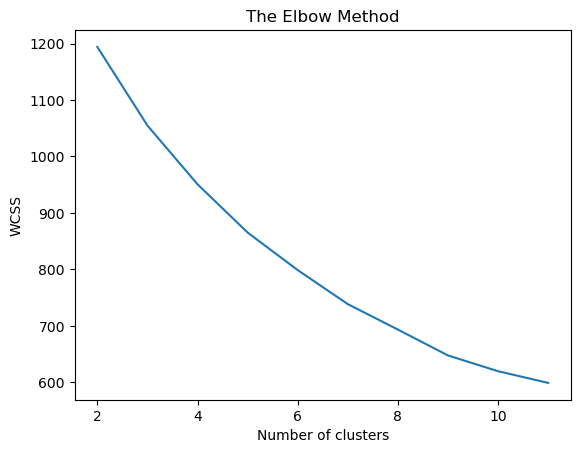

In [41]:
# Find optimal clusters number
nc_start = 2
nc_end = 12
wcss = []
for i in range(nc_start, nc_end):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(nc_start, nc_end), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
n_clusters = 4  # Set the number of clusters based on the elbow method

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=n_clusters, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
labels =kmeans.labels_

#append cluster assingments to original DataFrame
df["cluster"] = labels